In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [89]:
df = pd.read_csv("../data/cleaned/global_anomalies.csv")
df['ds'] = df['Year'].apply(lambda x:dt.date(x,12,31))
df.tail(10)

,Year,global_anom,NHem,SHem,global_smoothing,All forcings_dif_cum,Human_dif_cum,Natural_dif_cum,Anthropogenic tropospheric aerosol_dif_cum,Greenhouse gases_dif_cum,Land use_dif_cum,Orbital changes_dif_cum,Ozone_dif_cum,Solar_dif_cum,Volcanic_dif_cum,ds
130,2011,0.61,0.75,0.47,0.67,0.777294,0.754227,0.023067,-0.458140,1.156977,-0.134424,0.002586,0.002586,0.002586,0.002954,2011-12-31
131,2012,0.65,0.82,0.48,0.70,0.809796,0.782521,0.027276,-0.477526,1.201199,-0.139760,0.003058,0.003058,0.003058,0.005516,2012-12-31
132,2013,0.68,0.80,0.56,0.74,0.834173,0.803741,0.030432,-0.492066,1.234366,-0.143761,0.003412,0.003412,0.003412,0.007438,2013-12-31
133,2014,0.75,0.92,0.58,0.79,0.891053,0.853255,0.037798,-0.525992,1.311754,-0.153098,0.004237,0.004237,0.004237,0.011921,2014-12-31
134,2015,0.90,1.18,0.63,0.83,1.012937,0.959356,0.053581,-0.598692,1.477588,-0.173106,0.006007,0.006007,0.006007,0.021528,2015-12-31
135,2016,1.02,1.31,0.73,0.88,1.110445,1.044237,0.066208,-0.656851,1.610254,-0.189112,0.007422,0.007422,0.007422,0.029213,2016-12-31
136,2017,0.93,1.18,0.67,0.92,1.037314,0.980576,0.056738,-0.613231,1.510754,-0.177107,0.006361,0.006361,0.006361,0.023449,2017-12-31
137,2018,0.85,1.05,0.66,0.95,0.972309,0.923989,0.048320,-0.574459,1.422310,-0.166437,0.005417,0.005417,0.005417,0.018325,2018-12-31
138,2019,0.99,1.22,0.75,0.98,1.086068,1.023017,0.063052,-0.642311,1.577087,-0.185110,0.007069,0.007069,0.007069,0.027292,2019-12-31
139,2020,1.02,1.36,0.69,1.01,1.110445,1.044237,0.066208,-0.656851,1.610254,-0.189112,0.007422,0.007422,0.007422,0.029213,2020-12-31


In [5]:
dff = df.copy()
# dff["All forcings Y-1"] = df["All forcings"]-df["All forcings"].shift(1)
# dff = dff.dropna()

X = dff["Year"].values.reshape(-1,1)
y = dff["global_anom"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

LR: 0.597200 (0.391852)
NN: -0.080803 (0.804377)
KNN: 0.787556 (0.141310)
RF: 0.799510 (0.147020)
SVR: -0.252328 (0.949349)


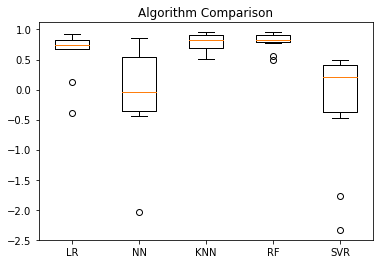

In [6]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor(n_neighbors=2))) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

0.7683310188660676
0.6822073236990889
Mean Absolute Error: 0.15702654055354398
Mean Squared Error: 0.0327758135784522
Root Mean Squared Error: 0.18104091686260373


In [8]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=0.1)
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred2))
print('Mean Squared Error:', mean_squared_error(y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred2)))

0.7682845080290991
0.684687318217058
Mean Absolute Error: 0.1564529649330016
Mean Squared Error: 0.032520037268744
Root Mean Squared Error: 0.18033312859467615


In [9]:
from sklearn.linear_model import ElasticNet
model3 = ElasticNet(alpha=0.1,l1_ratio=0.7)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred3))
print('Mean Squared Error:', mean_squared_error(y_test, pred3))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred3)))

0.7683080726134353
0.6839628459706366
Mean Absolute Error: 0.15662366632060803
Mean Squared Error: 0.03259475632006972
Root Mean Squared Error: 0.18054017924016172


In [10]:
model4 = MLPRegressor(solver = 'lbfgs', random_state=1)
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred4))
print('Mean Squared Error:', mean_squared_error(y_test, pred4))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred4)))

-0.02211062112356532
-0.10216516969169698
Mean Absolute Error: 0.28763740692313794
Mean Squared Error: 0.11367272699598903
Root Mean Squared Error: 0.33715386249602575


In [11]:
model5 = KNeighborsRegressor(n_neighbors=2)
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred5))
print('Mean Squared Error:', mean_squared_error(y_test, pred5))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred5)))

0.9736441289027578
0.894341838858838
Mean Absolute Error: 0.086
Mean Squared Error: 0.010897142857142855
Root Mean Squared Error: 0.10438938095966876


In [12]:
model6 = RandomForestRegressor(n_estimators=6)
model6.fit(X_train,y_train)
pred6 = model6.predict(X_test)
print("##########")
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred6))
print('Mean Squared Error:', mean_squared_error(y_test, pred6))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred6)))

##########
0.9873576999380267
0.8990674606001411
Mean Absolute Error: 0.08366666666666668
Mean Squared Error: 0.010409761904761906
Root Mean Squared Error: 0.10202824072168404


In [14]:
years = np.arange(2021,2050).reshape(-1,1)
model.predict(years)

array([[0.62925123],
       [0.63726432],
       [0.64527741],
       [0.6532905 ],
       [0.66130358],
       [0.66931667],
       [0.67732976],
       [0.68534285],
       [0.69335594],
       [0.70136903],
       [0.70938212],
       [0.71739521],
       [0.7254083 ],
       [0.73342138],
       [0.74143447],
       [0.74944756],
       [0.75746065],
       [0.76547374],
       [0.77348683],
       [0.78149992],
       [0.78951301],
       [0.7975261 ],
       [0.80553918],
       [0.81355227],
       [0.82156536],
       [0.82957845],
       [0.83759154],
       [0.84560463],
       [0.85361772]])

In [106]:
from fbprophet import Prophet
df_model = df[["ds","global_anom"]].rename({'global_anom':"y"},axis=1)
m = Prophet(changepoint_prior_scale= 0.5,
 holidays_prior_scale= 0.1,
 n_changepoints=200,
 seasonality_mode='multiplicative')
m.fit(df_model)  # df is a pandas.DataFrame with 'y' and 'ds' columns

# m.predict(years)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 111.


In [115]:
future = m.make_future_dataframe(periods=30,freq='y')
pred = m.predict(future)

In [116]:
pred.tail(31)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
139,2020-12-31,0.039469,0.870095,1.032828,0.039469,0.039469,23.182406,23.182406,23.182406,23.182406,23.182406,23.182406,0.0,0.0,0.0,0.954462
140,2021-12-31,0.040452,0.892315,1.068310,0.039840,0.041008,23.261450,23.261450,23.261450,23.261450,23.261450,23.261450,0.0,0.0,0.0,0.981428
141,2022-12-31,0.041435,0.905382,1.106751,0.039338,0.043507,23.323847,23.323847,23.323847,23.323847,23.323847,23.323847,0.0,0.0,0.0,1.007860
142,2023-12-31,0.042418,0.904839,1.163180,0.038299,0.046451,23.369522,23.369522,23.369522,23.369522,23.369522,23.369522,0.0,0.0,0.0,1.033705
143,2024-12-31,0.043404,0.873017,1.220027,0.037098,0.049814,23.182406,23.182406,23.182406,23.182406,23.182406,23.182406,0.0,0.0,0.0,1.049602
144,2025-12-31,0.044386,0.832372,1.300386,0.035616,0.053485,23.261450,23.261450,23.261450,23.261450,23.261450,23.261450,0.0,0.0,0.0,1.076879
145,2026-12-31,0.045369,0.801470,1.396419,0.033785,0.057667,23.323847,23.323847,23.323847,23.323847,23.323847,23.323847,0.0,0.0,0.0,1.103556
146,2027-12-31,0.046352,0.770036,1.512467,0.031552,0.061444,23.369522,23.369522,23.369522,23.369522,23.369522,23.369522,0.0,0.0,0.0,1.129581
147,2028-12-31,0.047338,0.693011,1.608587,0.029101,0.065777,23.182406,23.182406,23.182406,23.182406,23.182406,23.182406,0.0,0.0,0.0,1.144741
148,2029-12-31,0.048321,0.626674,1.717568,0.026805,0.070217,23.261450,23.261450,23.261450,23.261450,23.261450,23.261450,0.0,0.0,0.0,1.172329


In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()